The analys presented performs regression modelling to establish explanatory relationship between ESG factors and FDI. The countries selected are emerging markets within the East African region, namely Burundi, Rwanda, Kenya, Tanzania, Uganda and Ethiopia. A few other countries within this region such as South Sudan were excluded due to insufficient data required for analysis. Factors for ESG have been collected for 5 years (2017 - 2022)


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Upload and Preparation

In [5]:
import pandas as pd

# Load the Excel file
file_path = '/content/ESG Clean1.xlsx'
esg_data = pd.read_excel(file_path)

# Exploring the data structure
esg_data.head(), esg_data.columns


(                                         Series Name Series Code Country Name  \
 0  Foreign direct investment, net inflows (% of GDP)         FDI        Kenya   
 1  Foreign direct investment, net inflows (% of GDP)         FDI       Uganda   
 2  Foreign direct investment, net inflows (% of GDP)         FDI     Tanzania   
 3  Foreign direct investment, net inflows (% of GDP)         FDI       Rwanda   
 4  Foreign direct investment, net inflows (% of GDP)         FDI      Burundi   
 
   Country Code      2017      2018      2019      2020      2021      2022  
 0          KEN  1.640837  0.832686  0.468169  0.423521  0.422364  0.347014  
 1          UGA  2.610889  3.205128  3.686204  3.168813  4.066738  6.480676  
 2          TZA  1.760116  1.704410  1.994594  1.428460  1.684943  1.669089  
 3          RWA  2.961536  3.799501  2.542900  1.499983  1.914272  2.993350  
 4          BDI  0.011620  0.036883  0.040557  0.329176  0.357862  0.385887  ,
 Index([ 'Series Name',  'Series Code

In [8]:
# Pivot the data to have years as rows and series codes as columns for each country
esg_pivoted = esg_data.melt(id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'],
                            var_name='Year', value_name='Value')

# Pivot again to spread series codes across columns, indexed by country, year
esg_pivoted = esg_pivoted.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                      columns='Series Code', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
esg_pivoted.reset_index(inplace=True)

# Display the restructured DataFrame
esg_pivoted.head(), esg_pivoted.columns


(Series Code Country Name Country Code  Year       AGRF       CO2       CoC  \
 0                Burundi          BDI  2017  28.546647  0.047429 -1.319238   
 1                Burundi          BDI  2018  29.011900  0.057850 -1.478067   
 2                Burundi          BDI  2019  28.844390  0.059571 -1.496807   
 3                Burundi          BDI  2020  28.624950  0.058384 -1.562949   
 4                Burundi          BDI  2021  28.660220  0.055645 -1.599391   
 
 Series Code    EDXPD       FDI       GDP        GE      POLS    RE    UEM  
 0            4.76202  0.011620  0.500001 -1.382490 -2.002574  88.2  1.263  
 1            5.07865  0.036883  1.609935 -1.449708 -1.570219  85.7  1.143  
 2            5.34700  0.040557  1.812565 -1.374780 -1.624993  84.8  1.027  
 3            5.32200  0.329176  0.327157 -1.302273 -1.542315  83.4  1.030  
 4            4.87100  0.357862  3.100000 -1.357402 -1.258358  83.1  1.138  ,
 Index(['Country Name', 'Country Code', 'Year', 'AGRF', 'CO2'

## Exploratory  Data Analysis


#### Summary Statistics

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = esg_pivoted


# Summary Statistics
# -------------------
# Display summary statistics for numerical columns
summary_stats = data.describe(include=['float64'])
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
Series Code       AGRF        CO2        CoC      EDXPD        FDI        GDP  \
count        36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean         26.591511   0.176453  -0.622591   4.034847   2.082628   4.753152   
std           4.597123   0.109190   0.652798   1.051532   1.557155   3.040865   
min          20.314910   0.047429  -1.599391   2.130520   0.011620  -3.373694   
25%          23.535185   0.104970  -1.055182   3.204430   0.457007   3.062827   
50%          25.070938   0.144051  -0.659202   4.260755   1.837194   4.980397   
75%          28.683535   0.222250  -0.405915   4.868666   3.037216   6.519628   
max          37.642228   0.410582   0.607265   5.590650   6.480676  10.857967   

Series Code         GE       POLS         RE        UEM  
count        36.000000  36.000000  36.000000  36.000000  
mean         -0.593589  -0.904148  82.794444   4.665333  
std           0.467256   0.650295   7.746251   3.960172  
min          -1.44

<br>

#### Checking distribution of data

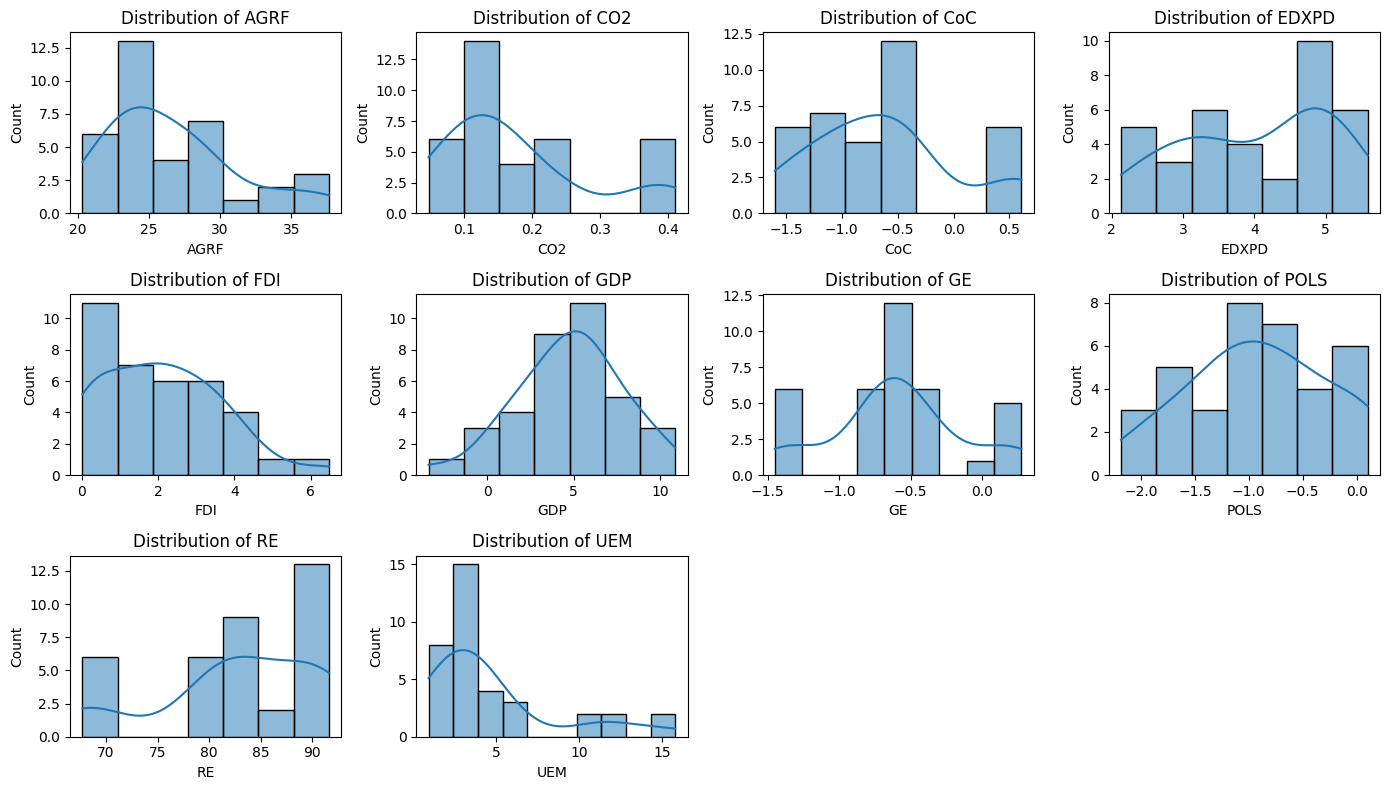

In [10]:
# Distribution of Variables
# -------------------------
# Plot histograms for numerical variables
numerical_columns = data.select_dtypes(include=['float64']).columns

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

From the distribution plots above,we see that Agricultural Production (AGRF), CO2 emissions, FDI, and Unemployment (UEM), exhibit right-skewed distributions. This means there exists some outlies given most values for these variables are low. Education Expenditure (EDXPD) and Renewable Energy (RE) show slight skewness, while GDP and Government Effectiveness (GE) display more symmetric distributions. The uniform distribution of Control of Corruption (CoC) highlights diverse experiences among countries, while the left-skewed distribution of Political Stability (POLS) suggests generally low stability in the countries selescted.

<br>

#### Correlatoin Analysis

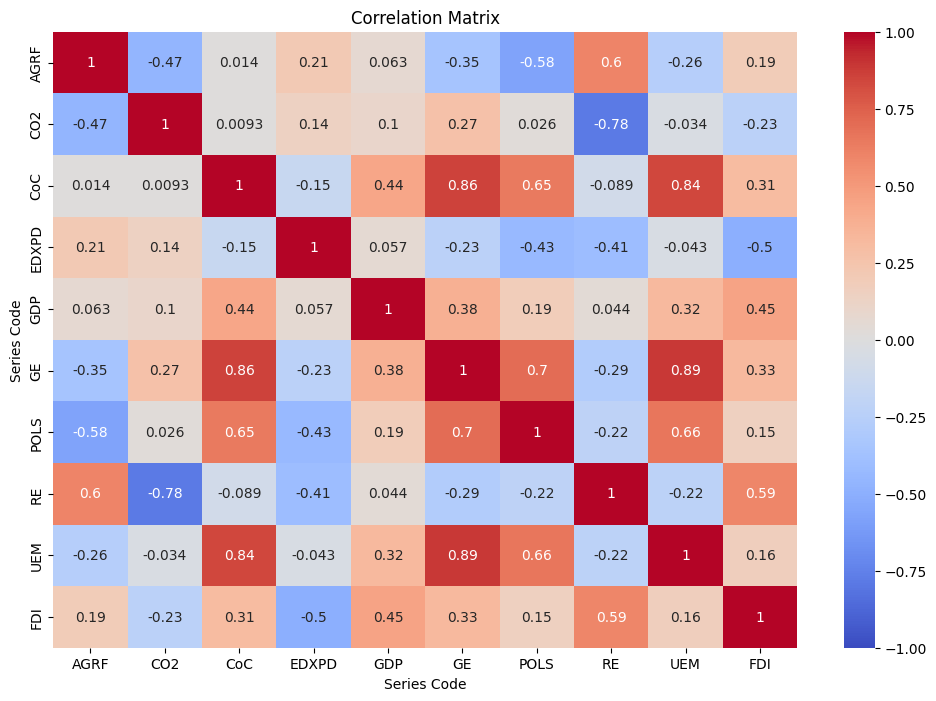

In [7]:

# Correlation Analysis
# --------------------
# Calculate the correlation matrix of the ESG factors to FDI
esg_factors = ['AGRF', 'CO2', 'CoC', 'EDXPD', 'GDP', 'GE', 'POLS', 'RE', 'UEM', 'FDI']
cordata = data[esg_factors]
correlation_matrix = cordata.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The results above depict some key relationships between ESG factors and Foreign Direct Investment (FDI). A strong positive correlation between renewable energy usage (RE) and FDI (0.59) implies that countries investing in renewable energy tend to attract more FDI.  

Government effectiveness (GE) and control of corruption (CoC) show moderate positive correlations with FDI (0.33 and 0.31) adding importance to good governance and corruption control in attracting FDI.

Education expenditure (EDXPD) has a moderate negative correlation with FDI (-0.5), which means that higher spending on education might be associated with lower immediate FDI inflows.

On the other hand, CO2 emissions show a weak negative correlation with FDI (-0.23) which tells us that environmental concerns might slightly deter foreign investments. Other factors such as agricultural production (AGRF), political stability (POLS), and unemployment (UEM) show weak correlations with FDI.

<br>

## Regression Analysis

#### Pooled Regression
The Pooled OLS regression combines all ESG and FDI variables across different countries and years, handling them as a single dataset. With this model, I can  identify the overall relationship between ESG factors and FDI inflows without accounting for country-specific effects.

In [11]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the dataset
data = esg_pivoted


# Pooled OLS Regression
# -------------------------------------
formula_pooled = 'FDI ~ AGRF + CO2 + CoC + EDXPD + GDP + GE + POLS + RE + UEM'
pooled_model = smf.ols(formula=formula_pooled, data=data).fit()
print("Pooled OLS Regression Results:")
print(pooled_model.summary())

Pooled OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    FDI   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     11.21
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           6.32e-07
Time:                        15:54:27   Log-Likelihood:                -37.977
No. Observations:                  36   AIC:                             95.95
Df Residuals:                      26   BIC:                             111.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4222

#### Fixed Effects Regression
The fixed effects regression model helps to account for unobserved heterogeneity across countries by including country-specific effects. With this approach, I seek to control for time-variant characteristics of each country that may influence FDI inflows.
In the presence of heteroscedasticity, I can ensure consistent standard errors by using heteroscedasticity-robust standard errors to ensure reliability of the output.

In [13]:
# Fixed Effects Regression with Heteroscedasticity-Robust Standard Errors
# ----------------------------------------------------------------------
# Creating dummy variables for each country (excluding one to avoid multicollinearity)
data = pd.get_dummies(esg_pivoted, columns=['Country Name'], drop_first=False)


# Include country-specific dummy variables in the formula
formula_fixed = 'FDI ~ AGRF + CO2 + CoC + EDXPD + GDP + GE + POLS + RE + UEM + Q("Country Name_Burundi") + Q("Country Name_Ethiopia") + Q("Country Name_Kenya") + Q("Country Name_Rwanda") + Q("Country Name_Tanzania") + Q("Country Name_Uganda")'

fixed_effects_model = smf.ols(formula=formula_fixed, data=data).fit(cov_type='HC1')
print("Fixed Effects Regression Results with Country-Specific Effects:")
print(fixed_effects_model.summary())



Fixed Effects Regression Results with Country-Specific Effects:
                            OLS Regression Results                            
Dep. Variable:                    FDI   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     33.15
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.00e-11
Time:                        15:54:57   Log-Likelihood:                -32.017
No. Observations:                  36   AIC:                             94.03
Df Residuals:                      21   BIC:                             117.8
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

<br>

The pooled OLS regression model explains 79.5% of the variance in FDI (R-squared = 0.795). Significant variables include Government Effectiveness (GE) and Renewable Energy (RE), both positively impacting FDI. This model nmay however suffer from omitted variable bias as it does not account for unobserved heterogeneity across countries.

On the other hand, the fixed effects regression model includes dummy variables for each country to capture country-specific effects. This significantly improves the explanatory power to 85.3% (R-squared = 0.853). This model confirms the significance of GE and RE having their coefficients remain positive and statistically significant.

The model shows significant variation in FDI inflows across countries. This model also addresses heteroscedasticity by using robust standard errors. From the output, we see that while general factors like GE and RE are crucial, country-specific characteristics also play a significant role in attracting FDI.

### Model Validation

To expand on the paper's assessment of regression results,I look into the assumptions, the quality of the fit, and the predictability of the model based on the pooled OLS and fixed effects regression models.  

#### Assessing Regression Assumptions
##### Linearity
The assumption of linearity in the relationship between the independent variables and the dependent variable is crucial. We can visualize this relationship using scatter plots to ensure there are no systematic deviations from a linear form.

##### Independence
This assumption can be assessed using Durbin-Watson statistics, which we noted from the regression output. A value close to 2 suggests no autocorrelation, which is ideal.

##### Homoscedasticity
We can use residual plots to check for constant variance across residuals. The presence of heteroscedasticity can be remedied by using robust standard errors, as seen in the fixed effects model.

##### Normality of Residuals
The normality can be visually assessed using a Q-Q plot and statistically tested with a Shapiro-Wilk test.

##### Multicollinearity
The condition numbers from the model outputs suggest potential multicollinearity, which could be addressed by examining the variance inflation factors (VIF) for each predictor.

<br>

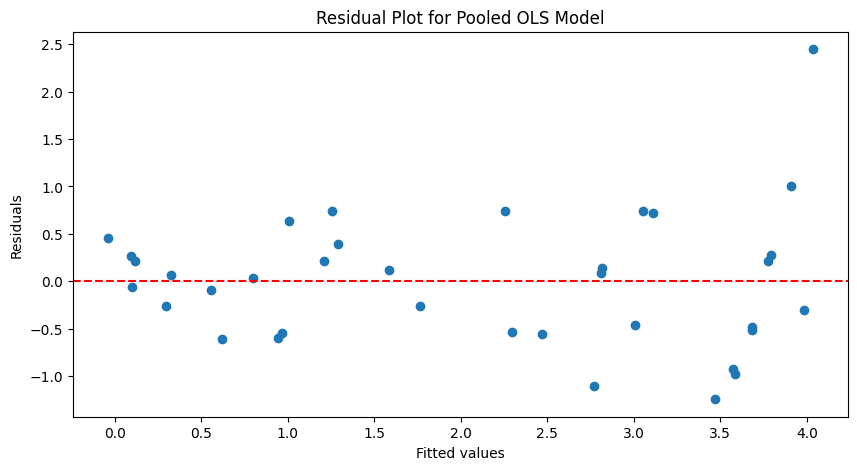

Breusch-Pagan test p-value: 0.5924976445413745
Shapiro-Wilk test p-value: 0.035252417331451846


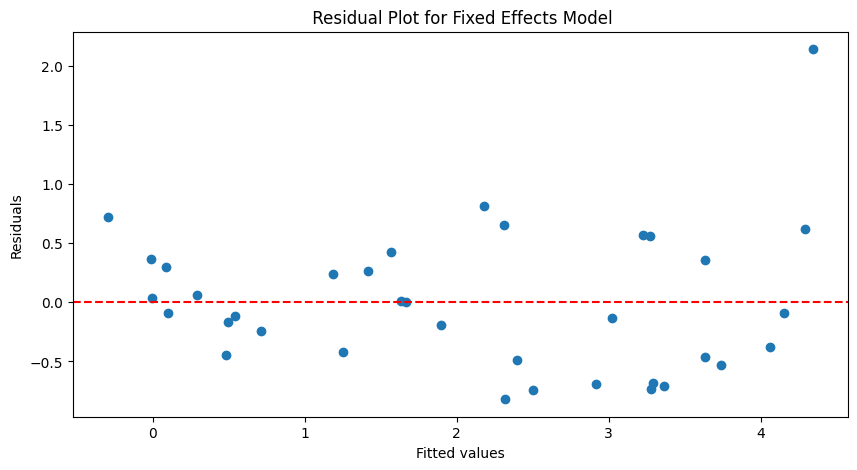

Breusch-Pagan test p-value: 0.7069557670685558
Shapiro-Wilk test p-value: 0.005915042277156235


In [19]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# Load the dataset
data = esg_pivoted

# Pooled OLS Regression
formula_pooled = 'FDI ~ AGRF + CO2 + CoC + EDXPD + GDP + GE + POLS + RE + UEM'
pooled_model = smf.ols(formula=formula_pooled, data=data).fit()

# Plotting residuals for pooled OLS model
residuals = pooled_model.resid
fitted = pooled_model.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Pooled OLS Model')
plt.show()

# Checking for homoscedasticity
_, pval, _, f_pval = het_breuschpagan(residuals, pooled_model.model.exog)
print('Breusch-Pagan test p-value:', pval)

# Checking for normality of residuals
stat, p = shapiro(residuals)
print('Shapiro-Wilk test p-value:', p)



# Plotting residuals for fixed effects model
residuals = fixed_effects_model.resid
fitted = fixed_effects_model.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title(' Residual Plot for Fixed Effects Model')
plt.show()

# Checking for homoscedasticity
_, pval, _, f_pval = het_breuschpagan(residuals, fixed_effects_model.model.exog)
print('Breusch-Pagan test p-value:', pval)

# Checking for normality of residuals
stat, p = shapiro(residuals)
print('Shapiro-Wilk test p-value:', p)


In [25]:
# Display AIC and BIC for Fixed Effects Model
print("Fixed Effects Model AIC:", fixed_effects_model.aic)
print("Fixed Effects Model BIC:", fixed_effects_model.bic)

Fixed Effects Model AIC: 94.03441481988594
Fixed Effects Model BIC: 117.78719889672759


In [26]:
# Display AIC and BIC for Pooled OLS Model
print("Pooled OLS Model AIC:", pooled_model.aic)
print("Pooled OLS Model BIC:", pooled_model.bic)

Pooled OLS Model AIC: 95.95464807469011
Pooled OLS Model BIC: 111.7898374592512


<Figure size 600x600 with 0 Axes>

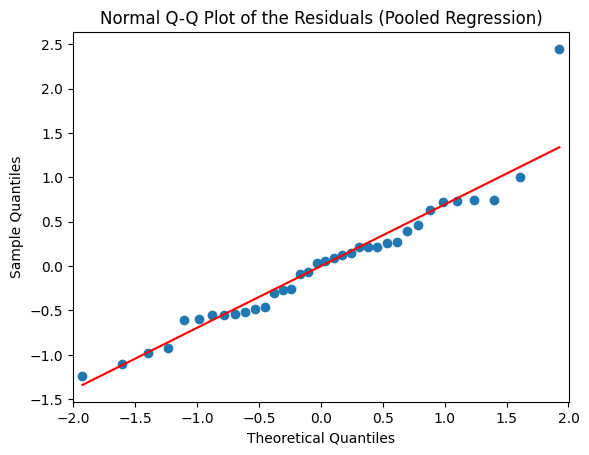

In [20]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Pooled regression model
residuals = pooled_model.resid
fitted_values = pooled_model.fittedvalues

# 1. Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')  # 's' means standardized line
plt.title('Normal Q-Q Plot of the Residuals (Pooled Regression)')
plt.show()



<Figure size 600x600 with 0 Axes>

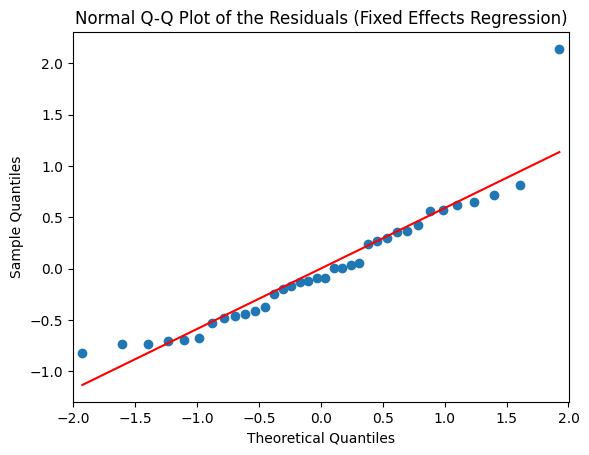

In [21]:


#Fixed Effects regression model
residuals = fixed_effects_model.resid
fitted_values = fixed_effects_model.fittedvalues

# 1. Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of the Residuals (Fixed Effects Regression)')
plt.show()

